<a href="https://colab.research.google.com/github/duongnhan13/Python/blob/main/dataset_2190_cholesterol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **I. PRE PROCESSING DATA**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/maxtran1997gmail/Files/main/dataset_2190_cholesterol.csv')

In [ ]:
df.head() 

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204


 * Data bao gồm 14 cột, thông tin các cột như sau:
1. age: độ tuổi khách hàng
2. sex: giới tính khách hàng (1 - Nam; 0 - Nữ)
3. cp: tình trạng đau ngực (4 cấp độ từ 1 đến 4)
4. trestbps: tình trạng huyết áp
5. fbs: xét nghiệm đường huyết (> 120mg/dl)
6. restecg: kết quả xét nghiệm đồ hình tim
7. thalach: nhịp tim lớn nhất đạt được
8. exang: gắng sức đau thắt ngực (1 - yes; 0 - no)
9. oldpeak: độ chênh xuống động mạch
10. slope: ST chênh (1 - chênh lên; 2 - phẳng; 3 chênh xuống) 
11. ca: số lượng mạch chính được soi bằng huỳnh quang (0-3)
12. thal:  
13. num: chẩn đoán bệnh tim (tình trạng bệnh mạch vành) -- Giá trị 0: hẹp đường kính < 50% -- Giá trị 1: hẹp đường kính > 50% (ở bất kỳ mạch máu chính nào ) 
14. chol:mg/dl 

In [ ]:
# check thông tin dataset và dạng dữ liệu của từng cột
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   fbs       303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   slope     303 non-null    int64  
 10  ca        303 non-null    object 
 11  thal      303 non-null    object 
 12  num       303 non-null    int64  
 13  chol      303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [ ]:
#check thông tin data các cột thấy có 2 cột 'ca' và 'thal' là dữ liệu dạng số nhưng data type đang ở dạng object
#check data bất thường trong hai cột 'ca' và 'thal'
print(df['ca'].unique())
print(df['thal'].unique())

['0' '3' '2' '1' '?']
['6' '3' '7' '?']


cột 'ca' và 'thal' có chứ datapoint '?' . Cần cleaning data hai cột này

In [ ]:
#thay thế '?' bằng nan value
df.replace("?", np.nan, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   fbs       303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   slope     303 non-null    int64  
 10  ca        299 non-null    object 
 11  thal      301 non-null    object 
 12  num       303 non-null    int64  
 13  chol      303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [ ]:
#đếm số nan value ở từng column
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
chol        0
dtype: int64

Cột 'ca' có 4 và 'thal' có 2 nan values, các cột còn lại đã fill đầy đủ

In [ ]:
null_data = df.isnull()
for i in null_data.columns.values.tolist():
    print(i)
    print(null_data[i].value_counts())
    print("----------------------------------")

age
False    303
Name: age, dtype: int64
----------------------------------
sex
False    303
Name: sex, dtype: int64
----------------------------------
cp
False    303
Name: cp, dtype: int64
----------------------------------
trestbps
False    303
Name: trestbps, dtype: int64
----------------------------------
fbs
False    303
Name: fbs, dtype: int64
----------------------------------
restecg
False    303
Name: restecg, dtype: int64
----------------------------------
thalach
False    303
Name: thalach, dtype: int64
----------------------------------
exang
False    303
Name: exang, dtype: int64
----------------------------------
oldpeak
False    303
Name: oldpeak, dtype: int64
----------------------------------
slope
False    303
Name: slope, dtype: int64
----------------------------------
ca
False    299
True       4
Name: ca, dtype: int64
----------------------------------
thal
False    301
True       2
Name: thal, dtype: int64
----------------------------------
num
False    303
Name:

In [ ]:
#thay các ô trống bằng giá trị mean
  
df["thal"].replace(np.nan,"%.2f" % df['thal'].astype('float').mean(axis=0), inplace=True)

In [ ]:
#check lại thông tin các cột
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   fbs       303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   slope     303 non-null    int64  
 10  ca        303 non-null    object 
 11  thal      303 non-null    object 
 12  num       303 non-null    int64  
 13  chol      303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


cột 'ca' và 'thal' đã được fill đầy đủ giá trị nhưng dạng dữ liệu vẫn chưa đúng. Cần astype cho hai cột này thành dạng float

In [ ]:
df['ca'] = df['ca'].map(lambda x: float(x))
df['thal'] = df['thal'].map(lambda x: float(x))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   fbs       303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   slope     303 non-null    int64  
 10  ca        303 non-null    float64
 11  thal      303 non-null    float64
 12  num       303 non-null    int64  
 13  chol      303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


Các cột đã được fill đầy đủ và dạng dữ liệu đã đúng. Giờ đến bước xây dựng model

* tạo tập train và tập test

In [ ]:
features = df.drop(['num'], axis=1)
X = np.asanyarray(features)
X

array([[ 63.  ,   1.  ,   1.  , ...,   0.  ,   6.  , 233.  ],
       [ 67.  ,   1.  ,   4.  , ...,   3.  ,   3.  , 286.  ],
       [ 67.  ,   1.  ,   4.  , ...,   2.  ,   7.  , 229.  ],
       ...,
       [ 57.  ,   1.  ,   4.  , ...,   1.  ,   7.  , 131.  ],
       [ 57.  ,   0.  ,   2.  , ...,   1.  ,   3.  , 236.  ],
       [ 38.  ,   1.  ,   3.  , ...,   0.67,   3.  , 175.  ]])

In [ ]:
y = np.asanyarray(df['num'])
y

array([0, 2, 1, 0, 0, 0, 3, 0, 2, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 3, 4, 0, 0, 0, 0, 3, 0, 2, 1, 0, 0, 0, 3, 1, 3, 0, 4, 0, 0, 0,
       1, 4, 0, 4, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 1, 0, 2, 2,
       1, 0, 2, 1, 0, 3, 1, 1, 1, 0, 1, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 1, 2, 3, 0, 0, 0, 0, 0, 0, 3, 0, 2, 1, 2, 3,
       1, 1, 0, 2, 2, 0, 0, 0, 3, 2, 3, 4, 0, 3, 1, 0, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 3, 1, 0, 0, 1, 0, 1, 0, 1, 4, 0, 0, 0, 0, 0, 0, 4,
       3, 1, 1, 1, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 1, 0, 4, 1,
       0, 1, 0, 0, 3, 2, 0, 0, 1, 0, 0, 2, 1, 2, 0, 3, 1, 2, 0, 3, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 3, 3, 3, 0, 1, 0, 4, 0, 3, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 1, 0, 0, 0, 3, 2, 0, 2, 1, 0, 0, 3, 2, 1, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 1, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0,
       4, 2, 2, 2, 1, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 3, 0, 2, 4,
       2, 0, 0, 0, 1, 0, 2, 2, 1, 0, 3, 1, 1, 2, 3,

In [ ]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


# **II. MODELS**

## **1. LOGISTIC REGRESSION**


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [ ]:
yhat = LR.predict(X_test)
yhat

array([3, 0, 0, 0, 3, 1, 0, 0, 0, 3, 0, 1, 2, 3, 0, 2, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, 0, 0, 0])

In [ ]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.15, 0.2 , 0.23, 0.25, 0.18],
       [0.37, 0.17, 0.15, 0.16, 0.15],
       [0.39, 0.17, 0.15, 0.14, 0.15],
       [0.42, 0.16, 0.14, 0.14, 0.14],
       [0.11, 0.18, 0.25, 0.26, 0.2 ],
       [0.12, 0.24, 0.22, 0.23, 0.19],
       [0.3 , 0.19, 0.19, 0.17, 0.16],
       [0.37, 0.16, 0.17, 0.15, 0.16],
       [0.36, 0.2 , 0.15, 0.15, 0.15],
       [0.08, 0.23, 0.24, 0.25, 0.2 ],
       [0.39, 0.16, 0.15, 0.15, 0.15],
       [0.2 , 0.22, 0.2 , 0.19, 0.18],
       [0.18, 0.17, 0.22, 0.21, 0.22],
       [0.09, 0.24, 0.23, 0.24, 0.2 ],
       [0.41, 0.14, 0.16, 0.15, 0.14],
       [0.15, 0.22, 0.23, 0.21, 0.19],
       [0.15, 0.23, 0.2 , 0.22, 0.19],
       [0.2 , 0.21, 0.2 , 0.2 , 0.19],
       [0.41, 0.16, 0.15, 0.13, 0.15],
       [0.29, 0.21, 0.15, 0.17, 0.18],
       [0.2 , 0.23, 0.19, 0.19, 0.18],
       [0.36, 0.18, 0.15, 0.16, 0.15],
       [0.33, 0.17, 0.17, 0.16, 0.16],
       [0.24, 0.2 , 0.21, 0.16, 0.18],
       [0.37, 0.16, 0.16, 0.15, 0.16],
       [0.31, 0.18, 0.18,

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[0,1,2,3,4]))

[[30  1  1  0  0]
 [ 7  2  1  1  0]
 [ 1  1  0  5  0]
 [ 1  1  4  2  0]
 [ 0  2  0  1  0]]


Confusion matrix, without normalization
[[30  1  1  0  0]
 [ 7  2  1  1  0]
 [ 1  1  0  5  0]
 [ 1  1  4  2  0]
 [ 0  2  0  1  0]]


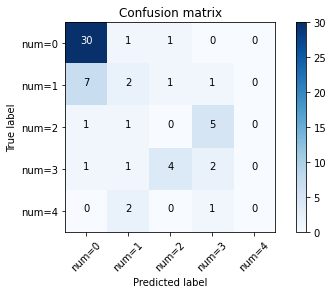

In [ ]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1,2,3,4])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['num=0','num=1','num=2','num=3','num=4'],normalize= False,  title='Confusion matrix')

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

1.3163892036672404

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85        32
           1       0.29      0.18      0.22        11
           2       0.00      0.00      0.00         7
           3       0.22      0.25      0.24         8
           4       0.00      0.00      0.00         3

    accuracy                           0.56        61
   macro avg       0.26      0.27      0.26        61
weighted avg       0.48      0.56      0.51        61



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred_lr = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_lr)

0.5573770491803278

In [ ]:
print("Accuracy of LR is:", 100 * accuracy_score(y_test, y_pred_lr), '%')

Accuracy of LR is: 55.73770491803278 %


## **2. NAVIE BAYES** 

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_gnb = gnb.fit(X_train, y_train).predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        32
           1       0.20      0.18      0.19        11
           2       0.00      0.00      0.00         7
           3       0.14      0.12      0.13         8
           4       0.00      0.00      0.00         3

    accuracy                           0.49        61
   macro avg       0.23      0.23      0.23        61
weighted avg       0.48      0.49      0.49        61



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_gnb)

0.4918032786885246

In [ ]:
print("Accuracy of GNB is:", 100 * accuracy_score(y_test, y_pred_gnb), '%')

Accuracy of GNB is: 49.18032786885246 %


## **3. SVM**

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC(kernel='rbf') # Linear Kernel 
clf.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_svm = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85        32
           1       0.22      0.18      0.20        11
           2       0.44      0.57      0.50         7
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         3

    accuracy                           0.61        61
   macro avg       0.28      0.34      0.31        61
weighted avg       0.49      0.61      0.54        61



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn import metrics
print("Accuracy of SVM is:", 100 * metrics.accuracy_score(y_test, y_pred_svm), '%')


Accuracy of SVM is: 60.65573770491803 %


## **4. DECISION TREE**

In [ ]:
from sklearn import tree
from sklearn.datasets import load_iris

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

[Text(0.3925426136363636, 0.9666666666666667, 'thal <= -0.45\ngini = 0.645\nsamples = 303\nvalue = [164, 55, 36, 35, 13]\nclass = 0'),
 Text(0.17670454545454545, 0.9, 'ca <= 0.175\ngini = 0.375\nsamples = 166\nvalue = [129, 22, 7, 6, 2]\nclass = 0'),
 Text(0.10454545454545454, 0.8333333333333334, 'trestbps <= 1.44\ngini = 0.201\nsamples = 117\nvalue = [104, 11, 2, 0, 0]\nclass = 0'),
 Text(0.08636363636363636, 0.7666666666666667, 'thalach <= -2.895\ngini = 0.15\nsamples = 111\nvalue = [102, 8, 1, 0, 0]\nclass = 0'),
 Text(0.07727272727272727, 0.7, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0]\nclass = 2'),
 Text(0.09545454545454546, 0.7, 'oldpeak <= 2.166\ngini = 0.135\nsamples = 110\nvalue = [102, 8, 0, 0, 0]\nclass = 0'),
 Text(0.08636363636363636, 0.6333333333333333, 'age <= 0.561\ngini = 0.12\nsamples = 109\nvalue = [102, 7, 0, 0, 0]\nclass = 0'),
 Text(0.045454545454545456, 0.5666666666666667, 'oldpeak <= 0.57\ngini = 0.044\nsamples = 89\nvalue = [87, 2, 0, 0, 0]\nclass = 0'),

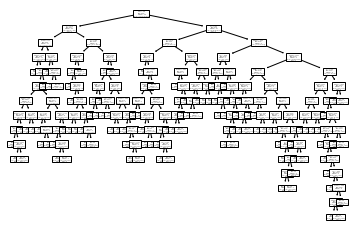

In [ ]:
tree.plot_tree(clf,feature_names=['age', 'sex', 'cp', 'trestbps', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'chol'], class_names=['0','1','2','3','4'])

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=4)
decision_tree = decision_tree.fit(X, y)
r = export_text(decision_tree, feature_names=['age', 'sex', 'cp', 'trestbps', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'chol'])
print(r)

|--- thal <= -0.45
|   |--- ca <= 0.18
|   |   |--- trestbps <= 1.44
|   |   |   |--- thalach <= -2.89
|   |   |   |   |--- class: 2
|   |   |   |--- thalach >  -2.89
|   |   |   |   |--- class: 0
|   |   |--- trestbps >  1.44
|   |   |   |--- chol <= 1.32
|   |   |   |   |--- class: 1
|   |   |   |--- chol >  1.32
|   |   |   |   |--- class: 0
|   |--- ca >  0.18
|   |   |--- cp <= 0.36
|   |   |   |--- oldpeak <= 1.04
|   |   |   |   |--- class: 0
|   |   |   |--- oldpeak >  1.04
|   |   |   |   |--- class: 2
|   |   |--- cp >  0.36
|   |   |   |--- slope <= 1.46
|   |   |   |   |--- class: 1
|   |   |   |--- slope >  1.46
|   |   |   |   |--- class: 3
|--- thal >  -0.45
|   |--- cp <= 0.36
|   |   |--- ca <= 0.18
|   |   |   |--- trestbps <= 2.69
|   |   |   |   |--- class: 0
|   |   |   |--- trestbps >  2.69
|   |   |   |   |--- class: 3
|   |   |--- ca >  0.18
|   |   |   |--- thalach <= -0.07
|   |   |   |   |--- class: 2
|   |   |   |--- thalach >  -0.07
|   |   |   |   |--- cla

In [ ]:
import graphviz

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("heart disease")

'heart disease.pdf'

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=['age', 'sex', 'cp', 'trestbps', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'chol'],class_names=['0','1','2','3','4'],filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  

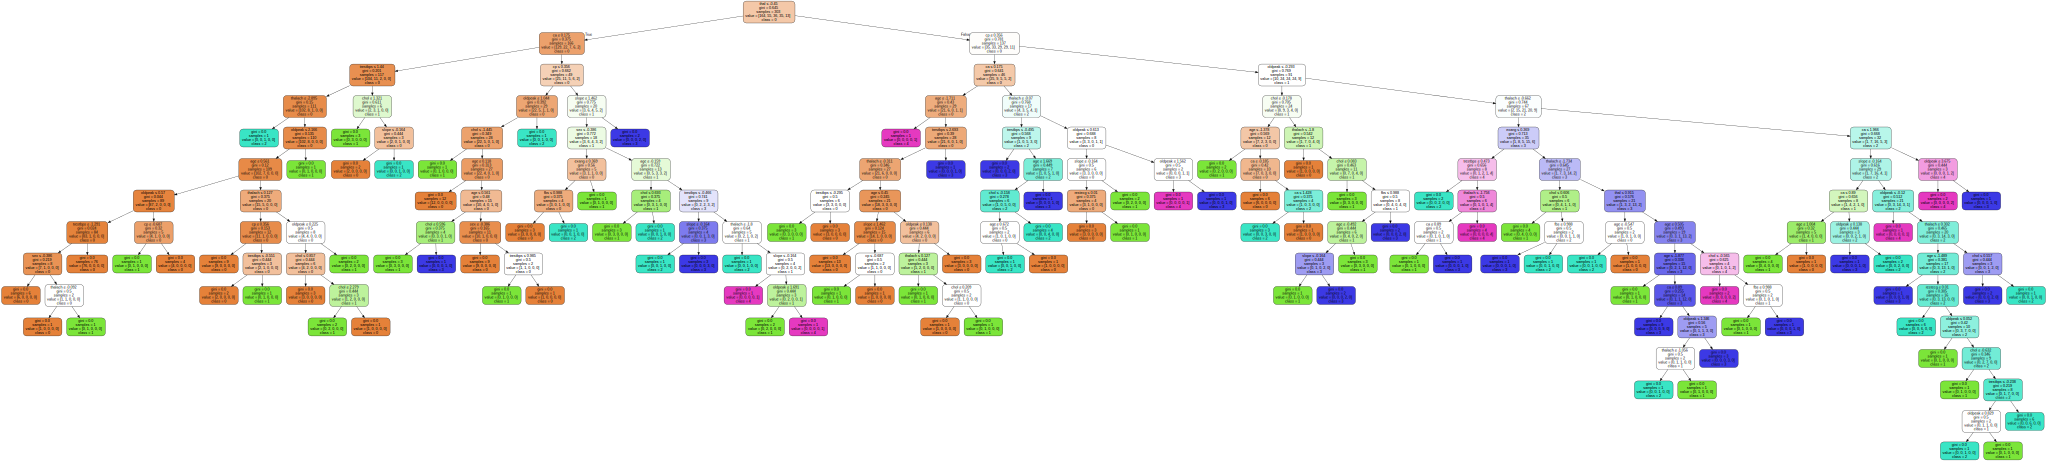

In [ ]:
graph

In [ ]:
heartTree = DecisionTreeClassifier(criterion="entropy")
heartTree.fit(X_train, y_train)
predTree = heartTree.predict(X_test)

In [ ]:
print(classification_report(y_test, predTree))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        32
           1       0.38      0.27      0.32        11
           2       0.20      0.29      0.24         7
           3       0.11      0.12      0.12         8
           4       0.00      0.00      0.00         3

    accuracy                           0.54        61
   macro avg       0.30      0.31      0.30        61
weighted avg       0.53      0.54      0.54        61



In [ ]:
y_pred_dt = predTree

In [ ]:
accuracy_score(y_test, y_pred_dt)

0.5409836065573771

In [ ]:
print("Accuracy of Decision Tree is:", 100 * accuracy_score(y_test, y_pred_dt), '%')

Accuracy of Decision Tree is: 54.09836065573771 %


## **5. RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(n_estimators=100) # , max_depth=5, random_state=1
model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':y_pred_rf}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_rfc = score
out_rfc = output
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rf))

Training Score: 1.0
Testing Score: 0.5901639344262295
   Predicted
0          2
1          0
2          0
3          0
4          2
% of people predicted with heart-disease: 0.14754098360655737
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        32
           1       0.11      0.09      0.10        11
           2       0.60      0.43      0.50         7
           3       0.29      0.25      0.27         8
           4       0.00      0.00      0.00         3

    accuracy                           0.59        61
   macro avg       0.35      0.34      0.34        61
weighted avg       0.53      0.59      0.55        61



In [ ]:
print("Accuracy of Random Forest is:", 100 * accuracy_score(y_test, y_pred_rf), '%')

Accuracy of Random Forest is: 59.01639344262295 %


## **6. BOOSTING**


In [ ]:
print("Accuracy of LR is:", 100 * accuracy_score(y_test, y_pred_lr), '%')
print("Accuracy of GNB is:", 100 * accuracy_score(y_test, y_pred_gnb), '%')
print("Accuracy of SVM is:", 100 * metrics.accuracy_score(y_test, y_pred_svm), '%')
print("Accuracy of Decision Tree is:", 100 * accuracy_score(y_test, y_pred_dt), '%')
print("Accuracy of Random Forest is:", 100 * accuracy_score(y_test, y_pred_rf), '%')


Accuracy of LR is: 55.73770491803278 %
Accuracy of GNB is: 49.18032786885246 %
Accuracy of SVM is: 60.65573770491803 %
Accuracy of Decision Tree is: 54.09836065573771 %
Accuracy of Random Forest is: 59.01639344262295 %


từ kết quả trên có thể thấy rằng mức độ chính xác của mô hình SVM cao nhất (60,65%) --> chọn mô hình này để tiếp tục boosting

In [ ]:
#check mối tương quan của các features với biến target
df_corr = df.corr()
df_corr

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol
age,1.000000,-0.097542,0.104139,0.284946,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.359513,0.127371,0.222853,0.208950
sex,-0.097542,1.000000,0.010084,-0.064456,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.092869,0.379306,0.224469,-0.199915
cp,0.104139,0.010084,1.000000,-0.036077,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.232338,0.264890,0.407075,0.072319
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098705,0.133537,0.157754,0.130120
fbs,0.118530,0.047862,-0.039975,0.175340,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.143958,0.070643,0.059186,0.009841
restecg,0.148868,0.021647,0.067505,0.146560,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.127503,0.024449,0.183696,0.171043
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.263418,-0.278521,-0.415040,-0.003432
exang,0.091661,0.146201,0.384060,0.064762,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.144727,0.328286,0.397057,0.061310
oldpeak,0.203805,0.102173,0.202277,0.189171,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.294583,0.340555,0.504092,0.046564
slope,0.161770,0.037533,0.152050,0.117382,0.059894,0.133946,-0.385601,0.257748,0.577537,1.000000,0.109623,0.286582,0.377957,-0.004062


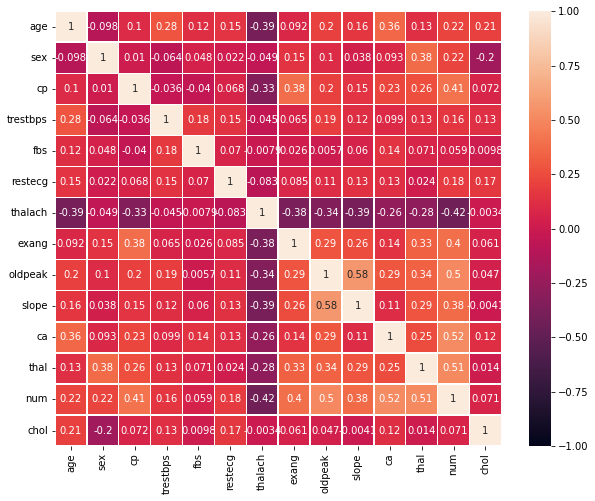

In [ ]:
fig, ax = plt.subplots(figsize =(10,8))
sns.heatmap(data=df_corr, annot = True,
            vmin=-1, vmax=1,
            linecolor='white', linewidth=0.5)

các features tương quan mạnh với biến target 'num' lần lượt là 'cp'; 'thalach'; 'exang'; 'oldpeak'; 'slope'; 'ca'; 'thal'

In [ ]:
features2 = df[['cp','thalach','exang','oldpeak','slope', 'ca', 'thal']]

In [ ]:
X2 = np.asanyarray(features2)
X2

array([[  1.  , 150.  ,   0.  , ...,   3.  ,   0.  ,   6.  ],
       [  4.  , 108.  ,   1.  , ...,   2.  ,   3.  ,   3.  ],
       [  4.  , 129.  ,   1.  , ...,   2.  ,   2.  ,   7.  ],
       ...,
       [  4.  , 115.  ,   1.  , ...,   2.  ,   1.  ,   7.  ],
       [  2.  , 174.  ,   0.  , ...,   2.  ,   1.  ,   3.  ],
       [  3.  , 173.  ,   0.  , ...,   1.  ,   0.67,   3.  ]])

In [ ]:
y2 = np.asanyarray(df['num'])
y2

array([0, 2, 1, 0, 0, 0, 3, 0, 2, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 3, 4, 0, 0, 0, 0, 3, 0, 2, 1, 0, 0, 0, 3, 1, 3, 0, 4, 0, 0, 0,
       1, 4, 0, 4, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 1, 0, 2, 2,
       1, 0, 2, 1, 0, 3, 1, 1, 1, 0, 1, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 1, 2, 3, 0, 0, 0, 0, 0, 0, 3, 0, 2, 1, 2, 3,
       1, 1, 0, 2, 2, 0, 0, 0, 3, 2, 3, 4, 0, 3, 1, 0, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 3, 1, 0, 0, 1, 0, 1, 0, 1, 4, 0, 0, 0, 0, 0, 0, 4,
       3, 1, 1, 1, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 1, 0, 4, 1,
       0, 1, 0, 0, 3, 2, 0, 0, 1, 0, 0, 2, 1, 2, 0, 3, 1, 2, 0, 3, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 3, 3, 3, 0, 1, 0, 4, 0, 3, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 1, 0, 0, 0, 3, 2, 0, 2, 1, 0, 0, 3, 2, 1, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 1, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0,
       4, 2, 2, 2, 1, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 3, 0, 2, 4,
       2, 0, 0, 0, 1, 0, 2, 2, 1, 0, 3, 1, 1, 2, 3,

In [ ]:
from sklearn import preprocessing
X2 = preprocessing.StandardScaler().fit(X2).transform(X2)

In [ ]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=4)
print ('Train set:', X2_train.shape,  y2_train.shape)
print ('Test set:', X2_test.shape,  y2_test.shape)

Train set: (242, 7) (242,)
Test set: (61, 7) (61,)


In [ ]:
#check giá trị trả về cột 'num'
df['num'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

Dữ liệu cột 'num' đang bị mất cân bằng, do giá trị trả về '0' và '4' gấp nhau hơn 12 lần
--> cần phải balance lại dữ liệu cột 'num'

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
oversample = SMOTE()
X2, y2 = oversample.fit_resample(X2, y2)
counter = Counter(y2)
for k,v in counter.items():
 per = v / len(y2) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=0, n=164 (20.000%)
Class=2, n=164 (20.000%)
Class=1, n=164 (20.000%)
Class=3, n=164 (20.000%)
Class=4, n=164 (20.000%)


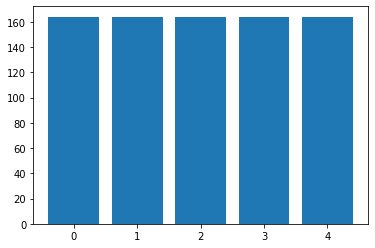

In [ ]:
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=4)
print ('Train set:', X2_train.shape,  y2_train.shape)
print ('Test set:', X2_test.shape,  y2_test.shape)

Train set: (656, 7) (656,)
Test set: (164, 7) (164,)


*train lại data sau khi được cân bằng với model SVM

In [ ]:
clf = svm.SVC(kernel='rbf') # Linear Kernel 
clf.fit(X2_train, y2_train)

SVC()

In [ ]:
y2_pred_svm = clf.predict(X2_test)

In [ ]:
print(classification_report(y2_test, y2_pred_svm))

              precision    recall  f1-score   support

           0       0.63      0.79      0.70        24
           1       0.80      0.32      0.45        38
           2       0.59      0.73      0.66        30
           3       0.58      0.76      0.66        34
           4       0.84      0.82      0.83        38

    accuracy                           0.67       164
   macro avg       0.69      0.68      0.66       164
weighted avg       0.70      0.67      0.66       164



In [ ]:
print("Accuracy of SVM after being balanced is:", 100 * metrics.accuracy_score(y2_test, y2_pred_svm), '%')

Accuracy of SVM after being balanced is: 67.07317073170732 %


Test với AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model = AdaBoostClassifier(random_state=1)
model.fit(X2_train, y2_train)
accuracy = model.score(X2_test, y2_test)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 39.02%


Test với GradietBoost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model = GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(X2_train, y2_train)
accuracy = model.score(X2_test, y2_test)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 65.24%


Test với XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBClassifier(random_state=1, eta=0.01)
model.fit(X2_train, y2_train)
accuracy = model.score(X2_test, y2_test)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 74.39%


# **III. CONCLUSION**

Sau khi check mối tương quan và chọn ra các features có độ tương quan lớn với biến target 'num' và cân bằng lại datapoint trong cột 'num'. Accuracy của model SVM đã tăng lên 67,07%.
Test dataset mới với lần lượt các thuật toán boosting, ta có XGBoost cho ra đột chính xác lớn nhất (74,39%)